In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from statistics import mean
from random import random
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load_pd = pd.read_csv(mouse_drug_data_to_load)
#mouse_drug_data_to_load_pd.head()

clinical_trial_data_to_load_pd = pd.read_csv(clinical_trial_data_to_load)
#clinical_trial_data_to_load_pd.head()

# Combine the data into a single dataset
merge_table = pd.merge(mouse_drug_data_to_load_pd, clinical_trial_data_to_load_pd, on="Mouse ID")

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = merge_table.groupby(["Drug", "Timepoint"])
average = grouped["Tumor Volume (mm3)"].mean()
average

# Convert to DataFrame
average_df = pd.DataFrame(average)

# Preview DataFrame
average_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
#Shuffle data
merge_table = merge_table.sample(frac=1).reset_index(drop=True)

# Create samples
sample_size = 100
samples = [[True if random() < 0.5 else False for x in range(0, sample_size)]
           for y in range(0, 10)]
x_axis = np.arange(0, len(samples), 1)

# Store the Standard Error of Tumor Volumes
means = [np.mean(s) for s in samples]
standard_errors = [sem(s) for s in samples]
standard_errors

# Add standard errors to original table
#merge_table["Standard Errors"] = standard_errors

# Group by Drug and Timepoint
#grouped_se = merge_table.groupby(["Drug", "Timepoint"])
#grouped_se

# Convert to DataFrame
#grouped_se_df = pd.DataFrame(grouped_se)

# Preview DataFrame
#grouped_se_df.head()

[0.05009082659620331,
 0.05024183937956913,
 0.05,
 0.05024183937956913,
 0.05009082659620331,
 0.05024183937956913,
 0.05009082659620331,
 0.05016135580465918,
 0.04988876515698589,
 0.05021167315686782]

In [4]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


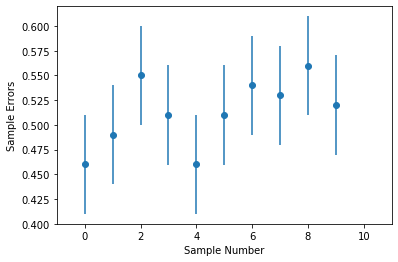

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(x_axis, means, standard_errors, fmt="o")

ax.set_xlim(-1, len(samples) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Sample Errors")

plt.show()

# Save the Figure
plt.savefig("../Images/Standard Errors.png")


In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice grouped by Drug and Timepoint (W can pass any metric)
grouped = merge_table.groupby(["Drug", "Timepoint"])
mice_count = grouped["Mouse ID"].count()
mice_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [12]:
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


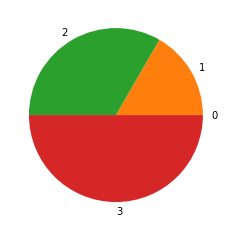

In [14]:
# Generate the Plot (Accounting for percentages)
labels = np.arange(len("Drug"))
sizes = [value for value in labels]

plt.pie(sizes, labels=labels)

# Save the Figure
plt.savefig("../Images/Mice Count.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [16]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)